## Chapter 04. 线性代数
线性代数是数学的一个分支，研究向量空间。

### 4.1 向量
抽象地说，向量是指可以加总（以生成新的向量），可以乘以标量（即数字），也可以生成新的向量的对象。具体来说，向量是有限维空间的点。

向量加法：
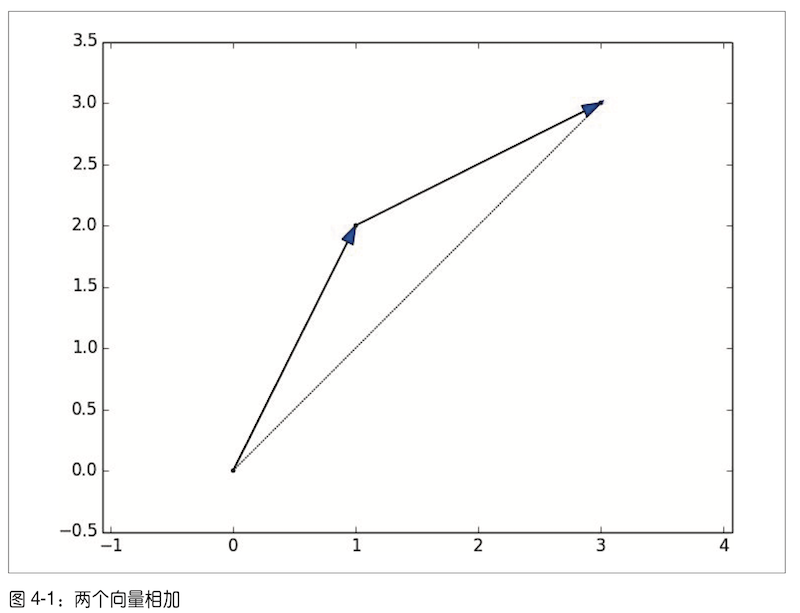

In [1]:
# 两个向量相加
def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v,w)]

v = [1, 2, 3, 4]
w = [6, 7, 8, 9]

vector_add(v, w)

[7, 9, 11, 13]

In [2]:
# 两个向量相减
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

v = [1, 2, 3, 4]
w = [6, 7, 8, 9]

vector_subtract(v, w)

[-5, -5, -5, -5]

In [3]:
from functools import partial, reduce

# 多个向量求和
def vector_sum(vectors):
    return reduce(vector_add, vectors)

v = [1, 2, 3, 4]
w = [6, 7, 8, 9]
u = [3, 4, 5, 6]

vector_sum([v, w, u])

[10, 13, 16, 19]

In [4]:
# 标量乘以向量
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

v = [1, 2, 3, 4]

scalar_multiply(7, v)

[7, 14, 21, 28]

In [5]:
# 向量均值
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1, 2, 3, 4]
w = [6, 7, 8, 9]
u = [3, 4, 5, 6]

vector_mean([v, w, u])

[3.333333333333333, 4.333333333333333, 5.333333333333333, 6.333333333333333]

点乘衡量了向量$v$在向量$w$方向延伸的程度。点乘的另一个解释是将$v$在$w$上投影所得到的向量的长度:
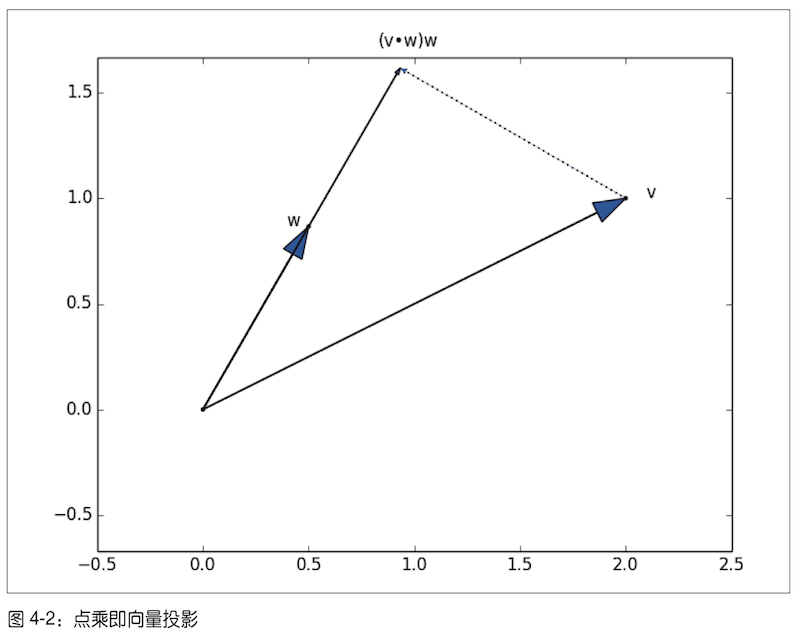

In [6]:
# 点乘
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

v = [1, 2, 3, 4]
w = [6, 7, 8, 9]
u = [3, 4, 5, 6]

dot(v, w)

80

In [7]:
# 向量的平方
def sum_of_squares(v):
    return dot(v, v)

v = [1, 2, 3, 4]
sum_of_squares(v)

30

In [8]:
import math

# 向量的长度
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

v = [1, 2, 3, 4]

magnitude(v)

5.477225575051661

In [9]:
import math

# 两个向量的距离 
def distance(v, w):
   return math.sqrt(sum_of_squares(vector_subtract(v, w)))

v = [1, 2, 3, 4]
w = [6, 7, 8, 9]

distance(v, w)

10.0

### 4.2 矩阵 
矩阵是一个二维的数据集合。 我们将矩阵表示为列表的列表，每个内部列表的大小都一样，表示矩阵的一行。如果A是一个矩阵，那么 A[i][j]就表示第i行第j列的元素。按照数学表达的惯例，我们通常用大写字母表示矩阵。

In [10]:
# 矩阵的形状
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

m1 = [[1,2,3], [4,5,6]]

shape(m1)

(2, 3)

In [11]:
# 获取行
def get_row(A, i):
    return A[i]

# 获取列
def get_column(A, j):
    return [A_i[j] for A_i in A]

get_row(m1, 1)

[4, 5, 6]

In [12]:
get_column(m1, 1)

[2, 5]

In [ ]:
# 生成矩阵
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

im = make_matrix(5, 5, is_diagonal)
im

In [ ]:
# 矩阵加法
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)

m1 = [[1,2,3], [4,5,6]]
m2 = [[3,4,5], [6,7,8]]

matrix_add(m1, m2)